### Pregunta de Negoci - Analistes del Perfil del Client:

> Quins són els perfils demogràfics que mostren més propensió a
contractar productes financers?
>

### Llibreries i càrrega de dades

In [15]:
"""Libreries que poden ser necessàries"""

# Manejo de datos
import pandas as pd                 # Análisis y manipulación de datos en tablas
import numpy as np                  # Cálculos numéricos y matrices
import os                           # Gestión de rutas de archivos

# Visualización de datos
import matplotlib.pyplot as plt     # Gráficos básicos en 2D
import seaborn as sns               # Gráficos estadísticos mejorados
import plotly.express as px         # Gráficos interactivos simplificados
import plotly.graph_objects as go   # Control avanzado de gráficos en Plotly
import plotly.io as pio             # Interfaz de entrada/salida de Plotly
import squarify                     # Visualización de diagramas de "treemap"

In [16]:
df = pd.read_csv("../Data/df.csv")

### Extracte KPIs

In [17]:

# Variables 
contactados   = df.nunique().id                                     # Número total de clientes contactados
suscribieron  = df[df['deposit'] == True].nunique().id             # Número de clientes que suscribieron 
duracion_llam = df[df['deposit'] == True].duration.sum()           # Duración de llamadas a suscriptores
llam_telf = df[df['contact'] == 'telephone']['campaign'].sum()      # Número de llamadas realizadas por teléfono
llam_cell = df[df['contact'] == 'cellular']['campaign'].sum()       # Número de llamadas realizadas por movil
llam = df['campaign'].sum()                                         # Número total de llamadas
contatos_previos_sus = df[df['deposit'] == True]['previous'].sum() # Número de contactos previos a suscriptores
suscribieron_por_mes = df[df['deposit'] == True].groupby('month').count()['deposit']  # Suscriptores en el mes
contactos_por_mes = df.groupby('month').count()['deposit']          # clientes contactados en el mes      
conversion_por_mes = suscribieron_por_mes / contactos_por_mes       # conversión por mes


# Prints
print("El número total de clientes contactados es:",contactados)
print("El número de suscriptores es:",suscribieron)
print("La duración total de las llamadas a suscriptores es:",duracion_llam)
print("El número de llamadas realizadas a teléfono fijo es: ", llam_telf)
print("El número de llamadas realizadas a móvil es: ", llam_cell)
print("El número total de llamadas realizadas es: ", llam)
print("El número total de contactos previos de los suscriptores es:", contatos_previos_sus)
print("La conversión por mes es: ", conversion_por_mes)

El número total de clientes contactados es: 11141
El número de suscriptores es: 5281
La duración total de las llamadas a suscriptores es: 2839340
El número de llamadas realizadas a teléfono fijo es:  2297
El número de llamadas realizadas a móvil es:  19221
El número total de llamadas realizadas es:  27957
El número total de contactos previos de los suscriptores es: 6185
La conversión por mes es:  month
Apr    0.624729
Aug    0.453166
Dec    0.908257
Feb    0.568475
Jan    0.412791
Jul    0.414844
Jun    0.447908
Mar    0.898182
May    0.327782
Nov    0.427205
Oct    0.823980
Sep    0.842767
Name: deposit, dtype: float64


In [18]:
#KPIs
kpi1 = suscribieron/contactados          # porcentaje de conversión a depósito
kpi2 = duracion_llam/suscribieron        # promedio de duración de llamadas a suscriptores
kpi3_tel = llam_telf/llam                # porcentaje de llamadas a teléfono
kpi3_cell = llam_cell/llam               # porcentaje de llamadas a móvil
kpi3 = (llam_telf+llam_cell)/llam        # porcentaje de llamadas a teléfono o móvil
kpi4 = contatos_previos_sus/suscribieron # promedio de contactos previos a suscriptores
kpi5 = conversion_por_mes.idxmax()       # mes con mayor tasa de conversión
kpi5_tasa = conversion_por_mes.max()     # tasa de conversión del mes con mayor tasa de conversión




# Prints
print("KPI 1: El porcentaje de conversión a depósito es ",kpi1*100,"%")
print("KPI 2: La duración media de las llamadas a suscriptoreses",kpi2)
print("KPI 3: El porcentaje de llamadas realizadas por teléfono o móvil es ",kpi3*100,"%")
print("KPI 4: El porcentaje de contactos previos a suscriptores es ",kpi4)
print("KPI 5: El mes amb millor conversió ha sigut", kpi5, "amb una taxa de conversió de", kpi5_tasa)

KPI 1: El porcentaje de conversión a depósito es  47.40148999192173 %
KPI 2: La duración media de las llamadas a suscriptoreses 537.6519598560878
KPI 3: El porcentaje de llamadas realizadas por teléfono o móvil es  76.96820116607648 %
KPI 4: El porcentaje de contactos previos a suscriptores es  1.1711797008142397
KPI 5: El mes amb millor conversió ha sigut Dec amb una taxa de conversió de 0.908256880733945


### Extracte del EDA - Característiques personals

##### Age - deposit

<Axes: xlabel='deposit', ylabel='age'>

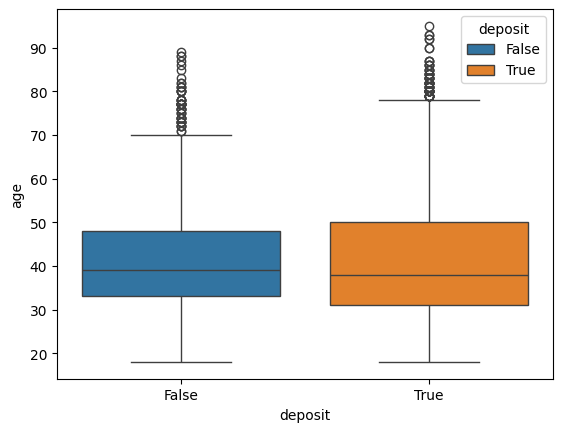

In [19]:
sns.boxplot(data=df, x='deposit', y='age', hue='deposit')

##### Job - deposit

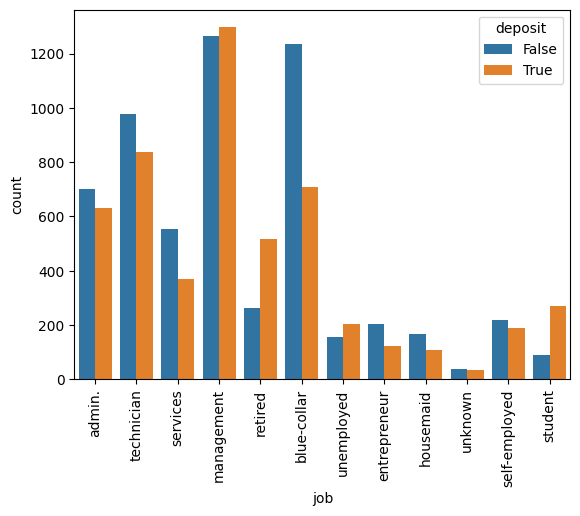

In [20]:
sns.countplot(data=df, x='job', hue='deposit')
plt.xticks(rotation=90)
plt.show()

Els que més: Estudiants i retired, però hi ha pocs estudiants i avis, management seria el següent. 

Nota sobre açò - Després, els perfils admin i technician, malgrat la menos proporció, hi ha molta gent auxí que compensa trucar-los.

##### Marital - deposit

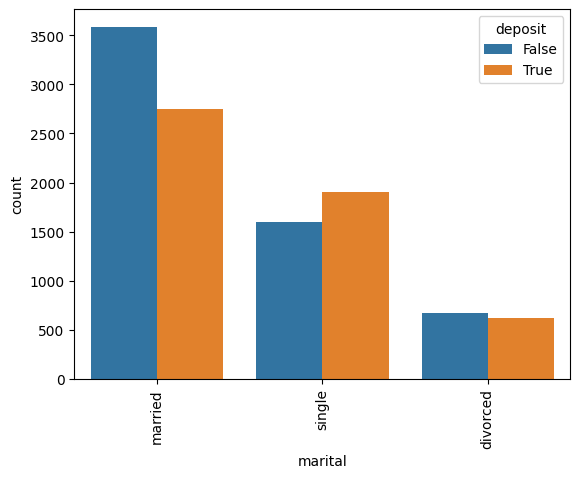

In [21]:
sns.countplot(data=df, x='marital', hue='deposit')
plt.xticks(rotation=90)
plt.show()

Més els que estan solters que els casats.

##### Education - deposit

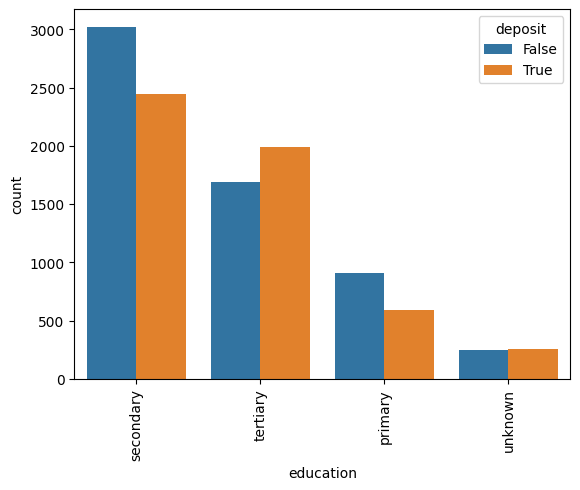

In [22]:
sns.countplot(data=df, x='education', hue='deposit')
plt.xticks(rotation=90)
plt.show()

Tertiary, estudis superiors

### Analisis Roser

Aplicarem la kpi1 (porcentaje de conversión a depósito) a diferents perfils.

De la EDA destaquen **estudiants** i **jubilats** (cosa que segurament distorsiona la mitjana, caldria compara la variança).
Les persones **solteres** que no han de consultar un prèstec amb un altre.

I les persones amb **estudis superiors**. Caldria comparar els estudiants de diversos nivells?


